In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from random import random
init_notebook_mode(connected=True)

In [2]:
def real_function(x):
    return x ** 3

In [3]:
testset_size = 100000

In [4]:
raw_x = range(int(float(testset_size)/2 * -1), int(float(testset_size)/2))
raw_x = np.array(raw_x)
raw_x = raw_x / 10000

In [5]:
raw_x

array([-5.    , -4.9999, -4.9998, ...,  4.9997,  4.9998,  4.9999])

In [6]:
noise = range(0, testset_size)
noise = np.array(noise)
noise = noise / 7000000
np.random.shuffle(noise)
x = raw_x + noise

In [7]:
x

array([-4.99491943, -4.98920071, -4.99219   , ...,  5.00674729,
        5.010607  ,  5.00359857])

In [8]:
y = real_function(x)

In [9]:
y

array([-124.61934419, -124.19180168, -124.41516447, ...,  125.50672962,
        125.79721382,  125.27008715])

In [10]:
x = x.reshape(-1, 1)

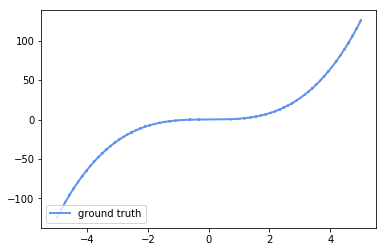

In [11]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='cornflowerblue', linewidth=2, label="ground truth")
# plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.legend(loc='lower left')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.25)

# from sklearn import preprocessing
# X_train = preprocessing.scale(X_train)
# X_test = preprocessing.scale(X_test)

In [30]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

In [31]:
model.score(X_test, Y_test)

0.83903028450195971

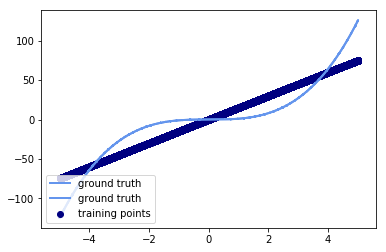

In [32]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='cornflowerblue', linewidth=2, label="ground truth")
plt.scatter(X_test, model.predict(X_test), color='navy', linewidth=1, label="training points")
#plt.scatter(, Y_test, color='navy', linewidth=1, label="training points")

plt.legend(loc='lower left')

plt.show()

In [49]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())

In [50]:
poly_model.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [51]:
poly_model.score(X_test, Y_test)

1.0

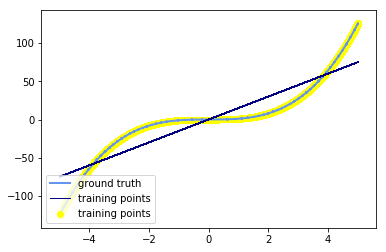

In [54]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='cornflowerblue', linewidth=2, label="ground truth")
plt.plot(X_test, model.predict(X_test), color='navy', linewidth=1, label="training points")
plt.scatter(X_test, poly_model.predict(X_test), color='yellow', linewidth=1, label="training points")

#plt.scatter(X_test, poly_model.predict(X_test), color='green', linewidth=1, label="training points")
#plt.scatter(, Y_test, color='navy', linewidth=1, label="training points")

plt.legend(loc='lower left')

plt.show()